<a href="https://colab.research.google.com/github/Siddhi212121/cat-dog-classification/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:05<00:00, 225MB/s]
100% 1.06G/1.06G [00:05<00:00, 217MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=15,validation_data=validation_ds)

Epoch 1/15
625/625 [==============================] - 82s 108ms/step - loss: 1.3891 - accuracy: 0.5889 - val_loss: 0.6087 - val_accuracy: 0.6636
Epoch 2/15
625/625 [==============================] - 64s 102ms/step - loss: 0.5953 - accuracy: 0.6973 - val_loss: 0.7347 - val_accuracy: 0.6784
Epoch 3/15
625/625 [==============================] - 64s 102ms/step - loss: 0.4951 - accuracy: 0.7632 - val_loss: 0.5353 - val_accuracy: 0.7456
Epoch 4/15
625/625 [==============================] - 63s 101ms/step - loss: 0.4325 - accuracy: 0.8023 - val_loss: 0.4695 - val_accuracy: 0.7858
Epoch 5/15
625/625 [==============================] - 67s 107ms/step - loss: 0.3824 - accuracy: 0.8289 - val_loss: 0.4227 - val_accuracy: 0.8012
Epoch 6/15
625/625 [==============================] - 64s 102ms/step - loss: 0.3152 - accuracy: 0.8623 - val_loss: 0.4421 - val_accuracy: 0.8200
Epoch 7/15
625/625 [==============================] - 66s 105ms/step - loss: 0.2474 - accuracy: 0.8971 - val_loss: 0.5588 - val_ac

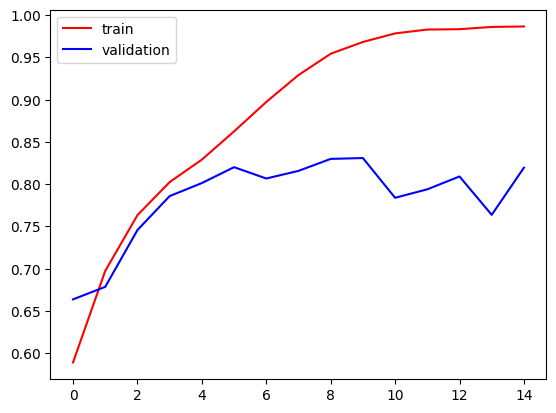

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

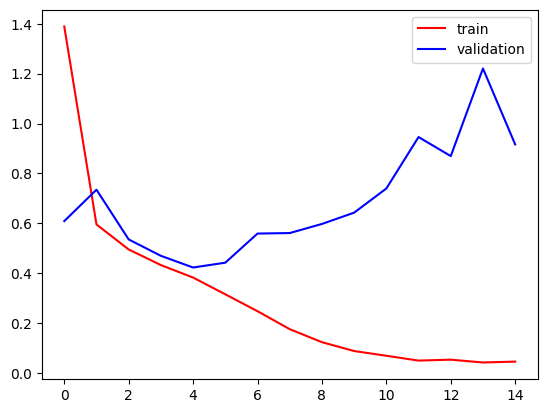

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
import cv2

In [19]:
test_img = cv2.imread('/content/cat.jpeg')

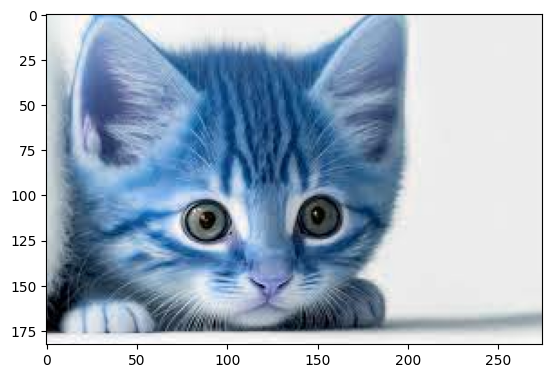

In [20]:
plt.imshow(test_img)

In [21]:
test_img.shape

(183, 275, 3)

In [22]:
test_img = cv2.resize(test_img,(256,256))

In [23]:
test_input = test_img.reshape((1,256,256,3))

In [24]:
model.predict(test_input)

1/1 [==============================] - 0s 270ms/step


array([[1.]], dtype=float32)

In [25]:
test_img = cv2.imread('/content/dog.jpeg')

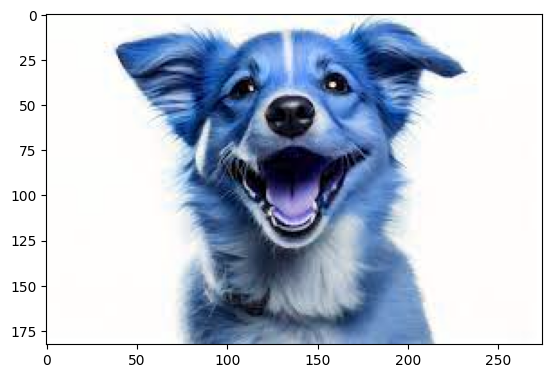

In [26]:
plt.imshow(test_img)

In [27]:
test_img.shape

(183, 275, 3)

In [28]:
test_img = cv2.resize(test_img,(256,256))

In [29]:
model.predict(test_input)

1/1 [==============================] - 0s 66ms/step


array([[1.]], dtype=float32)

In [37]:
test_img = cv2.imread('/content/cat1.jpeg')

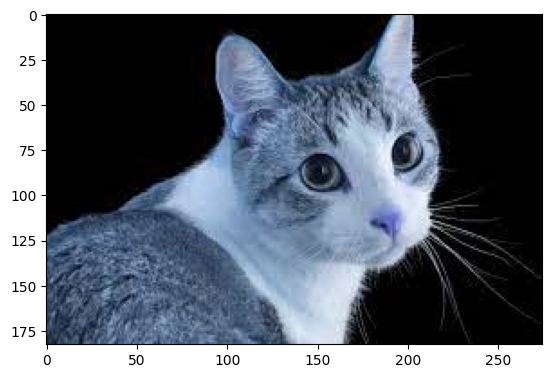

In [38]:
plt.imshow(test_img)

In [39]:
test_img.shape

(183, 275, 3)

In [40]:
test_img = cv2.resize(test_img,(256,256))

In [41]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)